# Random Walk

🎲 Apa itu Random Walk?

Random walk (jalan acak) adalah model matematis untuk menggambarkan pergerakan suatu partikel yang berpindah langkah demi langkah ke arah acak.
Konsep ini banyak digunakan dalam:

- fisika (difusi partikel, gerak Brown),

- ekonomi (pergerakan harga saham),

- dan ilmu komputer (algoritma Monte Carlo, pencarian acak).

![image.png](gambar/meme/kucingRW.png)

secara sederhana, distribusi random walk mengikuti distribusi binomial 

$$
P(X_N = x) = 
\binom{N}{\frac{N + x}{2}} \,
p^{\frac{N + x}{2}} \,
q^{\frac{N - x}{2}}
$$

In [46]:
import matplotlib.pyplot as plt
import numpy as np
from math import comb
# Jumlah langkah
N = 100 

# Probabilitas langkah ke kanan dan kiri
p = 0.5
q = 1 - p

# Semua posisi akhir yang mungkin
x = np.arange(-N, N+1, 2)

# Hitung peluang binomial P(X_N = x)
P = [comb(N, (N + xi)//2) * (p**((N + xi)//2)) * (q**((N - xi)//2)) for xi in x]

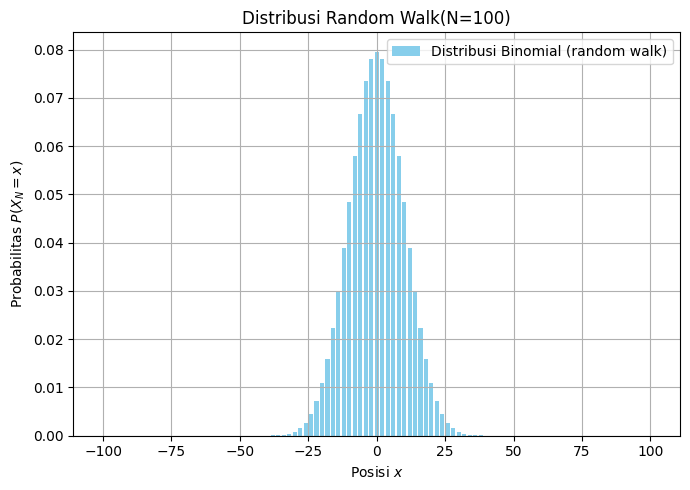

In [47]:
# Plot
plt.figure(figsize=(7,5))
plt.bar(x, P, width=1.5, color='skyblue' , label='Distribusi Binomial (random walk)')

plt.title(f'Distribusi Random Walk(N={N})')
plt.xlabel('Posisi $x$')
plt.ylabel('Probabilitas $P(X_N = x)$')
plt.legend()
plt.grid()
plt.tight_layout()


dan secara komputasi, Random walk bisa dibangun oleh simulasi monte carlo dan Markov chain

## Monte Carlo 
Metode Monte Carlo adalah
teknik simulasi berbasis komputasi yang menggunakan bilangan acak untuk memperkirakan kemungkinan hasil dari suatu peristiwa yang tidak pasti, sehingga sering disebut sebagai "simulasi probabilitas ganda". Metode ini bekerja dengan menganalisis data historis dan memprediksi berbagai kemungkinan hasil masa depan dengan mempertimbangkan faktor-faktor yang tidak pasti

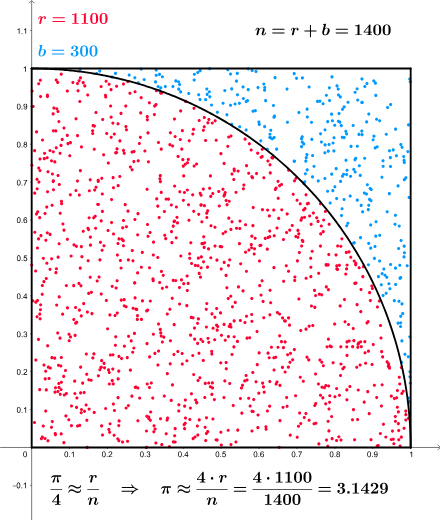

In [32]:
N = 500
x_rand,y_rand = np.random.rand(N),np.random.rand(N)

R = 1
In = 0
for i in range(N):
    if (x_rand[i]**2 + y_rand[i]**2) <=  R**2 :
        In += 1

nilai pi: 3.144


Text(0, 0.5, 'y')

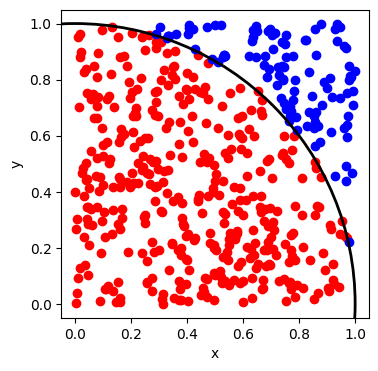

In [43]:
inside = x_rand**2 + y_rand**2 <= R**2

In = np.sum(inside)
print("nilai pi:", 4*In/N)
plt.figure(figsize=(4,4))
plt.scatter(x_rand[inside], y_rand[inside], color='red')
plt.scatter(x_rand[~inside], y_rand[~inside], color='blue')
plt.gca().set_aspect('equal')  # Buat sumbu x dan y sama panjang
circle = plt.Circle((0,0), R, color='black', fill=False, linewidth=2)
plt.gca().add_artist(circle)
plt.xlabel('x')
plt.ylabel('y')

## Markov Chain

adalah sebuah proses matematika di mana perpindahan dari satu keadaan ke keadaan lain hanya bergantung pada keadaan saat ini, bukan pada urutan keadaan sebelumnya. Sifat "tanpa memori" ini membuatnya menjadi alat yang kuat untuk memodelkan sistem dinamis dan memprediksi perilaku di masa depan


![image.png](gambar/profil/Markov_chain.png)


In [10]:
import matplotlib.animation as animation
from IPython.display import HTML
from matplotlib import rc

rc('animation', html='jshtml')

# Parameter random walk
L = 51            # ukuran grid L x L
center = L // 2   # titik pusat
n_walkers = 20000 # jumlah partikel (semakin banyak semakin halus)
n_steps = 400     # total langkah random walk
steps_per_frame = 5   # berapa langkah per frame animasi
frames = n_steps // steps_per_frame

print("Ukuran grid:", L, "x", L)
print("Titik pusat (center):", center)
print("Jumlah walker:", n_walkers)
print("Jumlah frame animasi:", frames)

Ukuran grid: 51 x 51
Titik pusat (center): 25
Jumlah walker: 20000
Jumlah frame animasi: 80


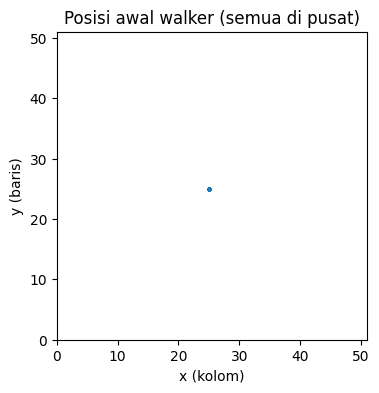

In [19]:
positions = np.zeros((n_walkers, 2), dtype=int)
positions[:, 0] = center   # sumbu y (baris)
positions[:, 1] = center   # sumbu x (kolom)

subset = 500
plt.figure(figsize=(4,4))
plt.scatter(positions[:subset,1], positions[:subset,0], s=2)
plt.xlim(0, L)
plt.ylim(0, L)
# plt.gca().invert_yaxis()
plt.title("Posisi awal walker (semua di pusat)")
plt.xlabel("x (kolom)")
plt.ylabel("y (baris)")
plt.show()

update posisi para walker sebesar +1 dan -1

$x_{i+1} = x_i + \delta_x$

$y_{i+1} = y_i + \delta_y$

In [20]:
def random_walk_step(positions):
    """
    Satu langkah random walk 2D:
    setiap partikel jalan 1 langkah ke atas/bawah/kiri/kanan (periodic boundary).
    """
    moves = np.random.randint(0, 4, size=n_walkers)
    # 0: up, 1: down, 2: left, 3: right

    positions[:, 0] += (moves == 0).astype(int) - (moves == 1).astype(int)  
    positions[:, 1] += (moves == 3).astype(int) - (moves == 2).astype(int)  

    # boundary periodik
    positions[:, 0] %= L
    positions[:, 1] %= L

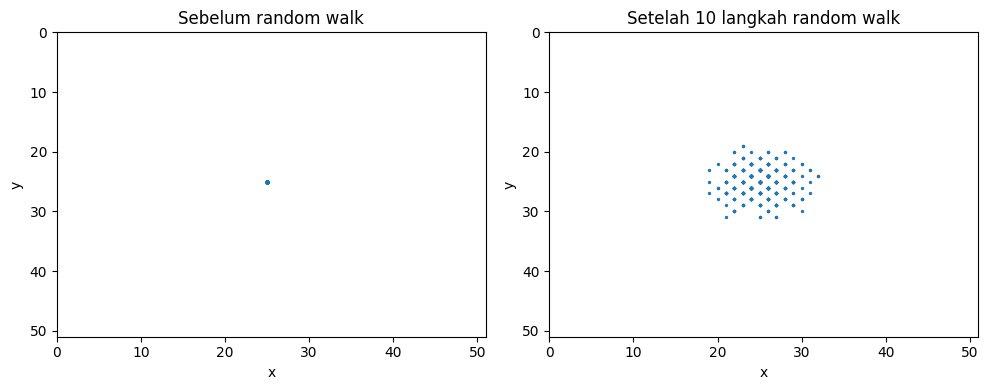

In [21]:
pos_demo = positions.copy()

plt.figure(figsize=(10,4))

# Sebelum langkah
plt.subplot(1,2,1)
plt.scatter(pos_demo[:500,1], pos_demo[:500,0], s=2)
plt.xlim(0, L); plt.ylim(0, L); plt.gca().invert_yaxis()
plt.title("Sebelum random walk")
plt.xlabel("x"); plt.ylabel("y")

for _ in range(10):
    random_walk_step(pos_demo)

plt.subplot(1,2,2)
plt.scatter(pos_demo[:500,1], pos_demo[:500,0], s=2)
plt.xlim(0, L); plt.ylim(0, L); plt.gca().invert_yaxis()
plt.title("Setelah 10 langkah random walk")
plt.xlabel("x"); plt.ylabel("y")

plt.tight_layout()

Menghitung jumlah walker pertiap koordinat sel 

$T(x_i,y_i) = \frac{\text{jumlah walker dalam sel}x_i,y_i}{n_{\text{walker}}}$

In [22]:
def compute_temperature(positions):
    """
    Hitung 'temperatur' sebagai histogram jumlah walker per sel grid.
    """
    T = np.zeros((L, L), dtype=float)
    # np.add.at mengakumulasi berdasarkan indeks
    np.add.at(T, (positions[:, 0], positions[:, 1]), 1.0)
    # normalisasi 
    T /= n_walkers
    return T

T0 = compute_temperature(positions)

fungsi diatas itu equivalen dengan

In [23]:
T = np.zeros((L, L))
for k in range(n_walkers):
    x, y = positions[k]
    T[x, y] += 1
T /= n_walkers

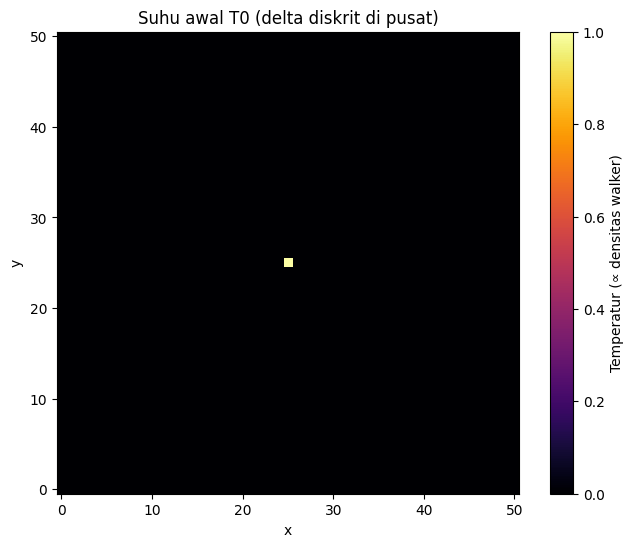

In [24]:
plt.figure(figsize=(8,6))
plt.imshow(T0, origin='lower', cmap='inferno')
plt.colorbar(label="Temperatur (∝ densitas walker)")
plt.title("Suhu awal T0 (delta diskrit di pusat)")
plt.xlabel("x"); plt.ylabel("y")
plt.show()

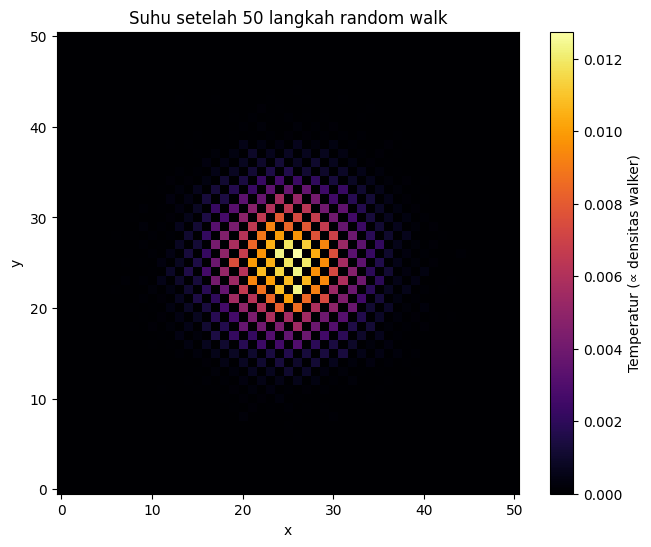

In [25]:
pos_snapshot = positions.copy()

n = 50
for _ in range(n):
    random_walk_step(pos_snapshot)

T_snap = compute_temperature(pos_snapshot)

plt.figure(figsize=(8,6))
plt.imshow(T_snap, origin='lower', cmap='inferno')
plt.colorbar(label="Temperatur (∝ densitas walker)")
plt.title(f"Suhu setelah {n} langkah random walk")
plt.xlabel("x"); plt.ylabel("y")
plt.show()

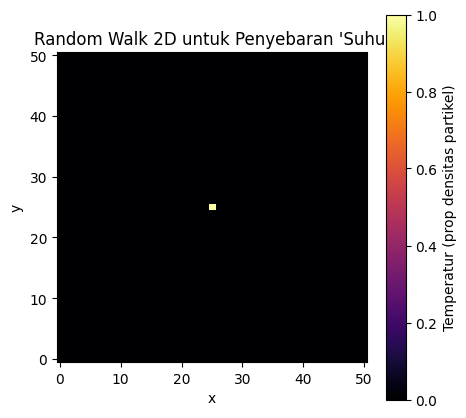

In [26]:
# Reset posisi ke pusat 
positions = np.zeros((n_walkers, 2), dtype=int)
positions[:, 0] = center
positions[:, 1] = center

T0 = compute_temperature(positions)

fig, ax = plt.subplots(figsize=(5, 5))
im = ax.imshow(T0, origin='lower', cmap='inferno', vmin=0, vmax=T0.max())
ax.set_title("Random Walk 2D untuk Penyebaran 'Suhu'")
ax.set_xlabel("x")
ax.set_ylabel("y")
cbar = plt.colorbar(im, ax=ax)
cbar.set_label("Temperatur (prop densitas partikel)")

In [27]:
def update(frame):
    # jalankan beberapa langkah random walk
    for _ in range(steps_per_frame):
        random_walk_step(positions)

    T = compute_temperature(positions)

    im.set_array(T)
    im.set_clim(vmin=0, vmax=T.max())  # skala warna
    ax.set_title(f"Random Walk 2D pada t = {frame*steps_per_frame} langkah")
    return [im]

ani = animation.FuncAnimation(
    fig,#
    update,
    frames=frames,
    interval=50,
    blit=False
)

In [28]:
plt.close(fig)
display(HTML(ani.to_jshtml()))

## Plot error
bandingkan hasil 

$P(x, y, t) = \frac{1}{4 \pi D t} \exp\!\left(-\frac{x^2 + y^2}{4 D t}\right)$


In [31]:

# waktu target (jumlah langkah random walk) ---
t_target = 80   

# Reset posisi walker ke pusat
positions = np.zeros((n_walkers, 2), dtype=int)
positions[:, 0] = center
positions[:, 1] = center

# run random walk 
for _ in range(t_target):
    random_walk_step(positions)

T_sim = compute_temperature(positions)  

D = 1.0 / 4.0

y, x = np.indices((L, L))
dx = x - center
dy = y - center
r2 = dx**2 + dy**2

# Solusi analitik: P(x,y,t)
T_the = np.exp(-r2 / (4 * D * t_target)) / (4 * np.pi * D * t_target)

In [32]:
# Normalisasi supaya jumlah di grid sama dengan 1 (karena gridnya berhingga, bukan ∞)
T_the /= T_the.sum()

r = np.sqrt(r2)
r_int = r.astype(int)   # bin radius ke bilangan bulat

# Bincount untuk rata-rata T di tiap radius
bin_counts = np.bincount(r_int.ravel())
sim_radial_sum = np.bincount(r_int.ravel(), weights=T_sim.ravel())
the_radial_sum = np.bincount(r_int.ravel(), weights=T_the.ravel())

radial_sim = sim_radial_sum / bin_counts
radial_the = the_radial_sum / bin_counts
r_vals = np.arange(len(radial_sim))

# Error radial
radial_err = radial_sim - radial_the
rmse = np.sqrt(np.mean(radial_err**2))
print(f"RMSE radial (sim vs teori) pada t = {t_target}: {rmse:.3e}")

RMSE radial (sim vs teori) pada t = 80: 7.159e-04


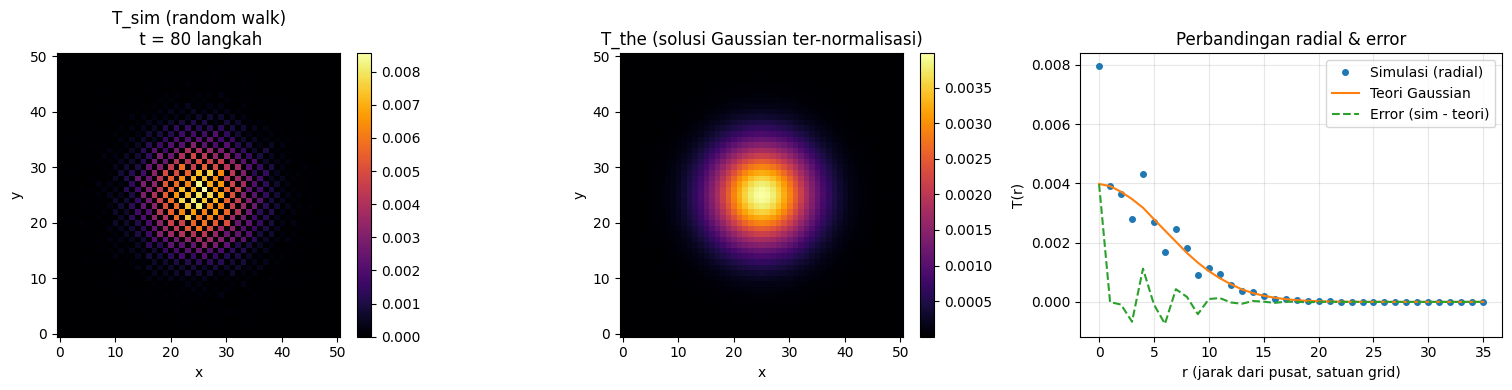

In [33]:
#plotting
fig, axes = plt.subplots(1, 3, figsize=(16, 4))
# map suhu simulasi
im0 = axes[0].imshow(T_sim, origin='lower', cmap='inferno')
axes[0].set_title(f"T_sim (random walk)\n t = {t_target} langkah")
axes[0].set_xlabel("x"); axes[0].set_ylabel("y")
plt.colorbar(im0, ax=axes[0], fraction=0.046, pad=0.04)
# map suhu teoritis (Gaussian)
im1 = axes[1].imshow(T_the, origin='lower', cmap='inferno')
axes[1].set_title("T_the (solusi Gaussian ter-normalisasi)")
axes[1].set_xlabel("x"); axes[1].set_ylabel("y")
plt.colorbar(im1, ax=axes[1], fraction=0.046, pad=0.04)
# map error
axes[2].plot(r_vals, radial_sim, 'o', markersize=4, label='Simulasi (radial)')
axes[2].plot(r_vals, radial_the, '-', label='Teori Gaussian')
axes[2].plot(r_vals, radial_err, '--', label='Error (sim - teori)')
axes[2].set_xlabel("r (jarak dari pusat, satuan grid)")
axes[2].set_ylabel("T(r)")
axes[2].set_title("Perbandingan radial & error")
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()